## Support Vector Machine (SVM)

SVM is a supervised algorithm which can be used for classification and regression. However, it is originally proposed for binary classification.

Given a dataset ($\vec{\mathbf{x}}$ or $\vec{\mathbf{\phi(x)}}$  ) which are labeled with $y_i \in\{-1,1\}$, we want to find a linear separator with the largest margin between these two types of data. The distance of any point (vector) from a line/plane can be obtained by the projection of that point on the unit normal vector of the line/plane ($\hat{w}$).

$$D_i=\hat{w}.\vec{\mathbf{x_i}}+b$$

So, if $D>0$ then we are in the blue zone of the figure below and if $D<0$ then we are in the red zone. It's our decision rule. The problem is to find optimal $\hat{w}$ and $b$.

<img src="fig/SVM_margin.png" width="600">
Source of the figure:https://svm.michalhaltuf.cz/support-vector-machines

To find the optimal seperator line, let's consider a margin between our training sample such that:

$$\vec{w}.x_{blue}+b\geq 1$$
$$\vec{w}.x_{red}+b\leq -1$$

Note that I removed the hat sign from $w$ since it is not a unit vector anymore. We multiplied ($\hat{w}.\vec{\mathbf{x_i}}+b\geq$ arbitrary margin) by (1/arbitrary margin). If you define label such that $y_i=-1$ for reds and $y_i=1$ for blues, then: 

$$y_i(\vec{w}.\vec{\mathbf{x_i}}+b)-1\geq 0$$

It gives us two boundaries: Blue: $\vec{w}.\vec{\mathbf{x_i}}+b=1$ ; Pink: $\vec{w}.\vec{\mathbf{x_i}}+b=-1$

The margin size can be computed using two support vectors, one on blue dashed line and the other on pink dashed line. 

$$\text{Margin}=(\vec{x}_{\text{on blue dashed line}}-\vec{x}_{\text{on pink dashed line}}).\frac{\vec{w}}{||w||}=(1-b-(-1-b)\frac{1}{||w||}=\frac{2}{||w||}$$

To get the optimal seperator we want to maximize the margin. So, we are going to maximize $\frac{2}{||w||}$ or minimize $||w||$. We know that $||w||$ is $\sqrt{\vec{w}.\vec{w}}$. Therefore, we can minimize $\frac{1}{2}||w||^2=\frac{1}{2}\vec{w}.\vec{w}$ which is computationally convenient. 

So, we can solve the following optimization problem:

$$min\ (\frac{1}{2}w^T.w)$$

$$\text{subject to:   } y_i({w}.{\mathbf{x_i}}+b)-1\geq 0 $$

Is that all? Not yet! Imagine we have some outliers (red points in blue region). In the above expression for optimization problem we did not take into account a level of tolerance for those outliers. We can consider this by defining a slack parameter ($\xi$)

$$min\ (\frac{1}{2}w^T.w+C\sum_i \xi_i)$$

$$\text{subject to:   } y_i({w}.{\mathbf{x_i}}+b)\geq 1-\xi_i \text{    and      } \xi_i \geq 0$$ 

To incorporate all the constraints, we can write the following Lagrangian and minimize it:

$$L=\frac{1}{2}w^T.w+C\sum_i \xi_i+\sum_i\alpha_i[1-\xi_i-y_i({w}.{\mathbf{x_i}}+b)]+\sum_i\eta_i(-\xi_i)$$

To minimize the Lagrangian, take the first derivative of the function and put that equal to zero.

$$\frac{\partial L }{\partial w}=w-\sum_i \alpha_i y_i{\mathbf{x_i}}=0 \Rightarrow w=\sum_i \alpha_i y_i{\mathbf{x_i}} $$

$$\frac{\partial L }{\partial b}=\sum_i \alpha_i y_i=0$$

$$\frac{\partial L }{\partial \xi_i}=C-\alpha_i-\eta_i=0$$

Since $\eta_i\geq 1$, it implies that $\alpha_i\leq C$.

Let's substitute $w=\sum_i \alpha_i y_i{\mathbf{x_i}}$ in the Lagrangian equation.

$$L=\sum_{i}\alpha_i-\frac{1}{2}\sum_i\sum_j \alpha_i \alpha_j y_i y_j (\vec{\mathbf{x_i}}.\vec{\mathbf{x_j}}) $$

And the constraints are:

$$(1):\ \sum_i \alpha_i y_i=0$$

$$(2):\ 0 \leq \alpha_i \leq C$$

If we define: $q=(1\ 1\ 1\ ... \ 1)$ and $P_{ij}=y_i y_j (\vec{\mathbf{x_i}}.\vec{\mathbf{x_j}})$, then:

$$max_{\alpha}(q^T\alpha-\frac{1}{2}\alpha^T P\alpha)$$

$$y^T\alpha=0$$

$$0 \leq \alpha_i \leq C$$

So, building an SVM model can be done by solving the above optimization problem.

We will use "cvxopt" package in Python to perform the optimization:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from sklearn.datasets.samples_generator import make_blobs

Let's create a pseudo dataset:

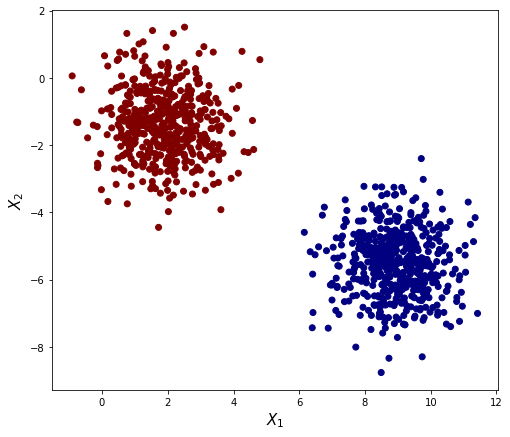

In [21]:
plt.figure(figsize=(8,7))
X,y=make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=1,random_state=200)
plt.scatter(X[:,0],X[:,1],c=y,cmap='jet')
plt.xlabel('$X_1$',fontsize=15)
plt.ylabel('$X_2$',fontsize=15)
plt.show()

Data are labeled with 0 and 1. To be consistent with our notation, we will map 0s to -1.

In [22]:
y[y==0]=-1

In [23]:
help(opt.solvers.qp)

Help on function qp in module cvxopt.coneprog:

qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
    
    
    Input arguments.
    
        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.
    
        q is an n x 1 dense 'd' matrix.
    
        G is an m x n dense or sparse 'd' matrix.
    
        h is an m x 1 dense 'd' matrix.
    
        A is a p x n dense or sparse 'd' matrix.
    
        b is a p x 1 dense 'd' matrix or None.
    
        solver is None or 'mosek'.
    
        The default values for G, h, A and b are empty matrices with
        zero rows.
    
    
    Output arguments (default solver).
    
        Returns a dictionary with keys 'status', 'x', 's', 'y', 'z',
        'primal ob

As you can see from the data above, we can define a seperator line without outliers. So, we will define C as infinite (e.g. $10^{10}$) (hard margin)

In [25]:
C=10**10

In [32]:
y=y.reshape(1000,1)

In [39]:
y.shape

(1000, 1)

In [42]:
y=y.astype('float64')

In [46]:
n_train=len(X)
print(len(X))

1000


In [48]:
X_=y*X
P_=np.dot(X_,X_.T)

In [50]:
P_.shape

(1000, 1000)

In [57]:
P=opt.matrix(P_)
b=opt.matrix([0.])
h=opt.matrix(np.hstack(([0.]*n_train,[C]*n_train)))
G=opt.matrix(np.vstack((np.eye(n_train)*-1.,np.eye(n_train))))
q=opt.matrix([-1.]*n_train)
A=opt.matrix(y.T)

In [58]:
sol=opt.solvers.qp(P,q,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0:  2.6702e+18 -3.5976e+22  9e+22  5e-01  1e-03
 1:  5.4273e+18 -3.8382e+21  6e+21  2e-02  2e+02
 2:  5.8166e+18 -1.5206e+20  2e+20  7e-04  5e+00
 3:  3.4546e+18 -4.9291e+18  9e+18  7e-06  5e-02
 4:  5.2821e+17 -5.6838e+17  1e+18  6e-08  1e-05
 5:  7.5724e+16 -8.3387e+16  2e+17  1e-08  4e-06
 6:  1.0851e+16 -1.1923e+16  2e+16  3e-09  2e-06
 7:  1.5549e+15 -1.7088e+15  3e+15  2e-09  6e-07
 8:  2.2281e+14 -2.4487e+14  5e+14  2e-09  2e-07
 9:  3.1928e+13 -3.5089e+13  7e+13  1e-10  9e-08
10:  4.5752e+12 -5.0281e+12  1e+13  2e-10  3e-08
11:  6.5561e+11 -7.2052e+11  1e+12  7e-11  1e-08
12:  9.3948e+10 -1.0325e+11  2e+11  6e-11  4e-09
13:  1.3462e+10 -1.4795e+10  3e+10  1e-11  2e-09
14:  1.9291e+09 -2.1201e+09  4e+09  7e-12  6e-10
15:  2.7644e+08 -3.0381e+08  6e+08  3e-12  2e-10
16:  3.9612e+07 -4.3536e+07  8e+07  3e-13  1e-10
17:  5.6760e+06 -6.2389e+06  1e+07  3e-13  3e-11
18:  8.1324e+05 -8.9414e+05  2e+06  2e-14  1e-11
19:  1.1649e+05 -1.28

In [60]:
alpha=np.array(sol['x'])
print(alpha)

[[2.93450435e-11]
 [3.98935068e-11]
 [2.95256615e-11]
 [1.05773700e-10]
 [4.76680981e-11]
 [3.94055540e-11]
 [2.35817106e-11]
 [2.64523315e-11]
 [3.07636988e-11]
 [2.58830284e-11]
 [2.64111650e-11]
 [3.96954015e-11]
 [2.76762836e-11]
 [3.44500189e-11]
 [2.77164902e-11]
 [2.69149967e-11]
 [3.08819176e-11]
 [2.47425434e-11]
 [5.48701650e-11]
 [4.37581054e-11]
 [2.47557293e-11]
 [6.47189006e-11]
 [2.62950295e-11]
 [5.09924376e-11]
 [2.91579007e-11]
 [3.22827475e-11]
 [2.99659238e-11]
 [3.88776441e-11]
 [3.68082753e-11]
 [3.93607000e-11]
 [2.75521713e-11]
 [3.12658777e-11]
 [2.96554103e-11]
 [3.94741634e-11]
 [4.37972336e-11]
 [5.42306992e-11]
 [6.38593397e-11]
 [2.88073044e-11]
 [5.25901884e-11]
 [3.26526492e-11]
 [6.24750672e-11]
 [1.96869787e-11]
 [4.46302105e-11]
 [2.94566880e-11]
 [3.42247615e-11]
 [4.75776807e-11]
 [3.39203407e-11]
 [2.18311556e-11]
 [2.84516411e-11]
 [4.83805944e-11]
 [5.39399615e-11]
 [2.80168816e-11]
 [7.76231153e-11]
 [3.43563355e-11]
 [2.84368465e-11]
 [1.794880

In [66]:
w=np.sum((alpha*y)*X,axis=0)
print(w)

[-0.68669636  0.38315689]


In [67]:
X_r=X[(y==1)[:,0]]

In [70]:
b=np.max(1-np.dot(X_r,w))
print(b)

4.983377686567152


Let's visualize the result

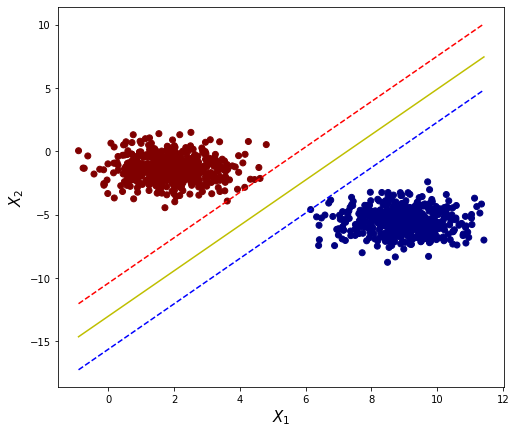

In [74]:
plt.figure(figsize=(8,7))
plt.scatter(X[:,0],X[:,1],c=y[:,0],cmap='jet')
plt.xlabel('$X_1$',fontsize=15)
plt.ylabel('$X_2$',fontsize=15)


x1_=np.linspace(np.min(X[:,0]),np.max(X[:,0]))
plt.plot(x1_,(-w[0]*x1_-b+1)/w[1],'r--')
plt.plot(x1_,(-w[0]*x1_-b-1)/w[1],'b--')
plt.plot(x1_,(-w[0]*x1_-b)/w[1],'y')

plt.show()